In [9]:
# @title IMPORT REQUIRED LIBRARIES
import pandas as pd        #-->
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


In [10]:
# @title Load and Parse Dataset
file_path = "/content/train_data.txt"

data = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split(" ::: ")
        if len(parts) == 4:
            _, title, genre, plot = parts
            data.append((title, genre, plot))

df = pd.DataFrame(data, columns=["title", "genre", "plot"])

In [11]:
# @title Text Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['plot'])

In [12]:
# @title Encode labels data
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['genre'])

In [13]:
# @title Spliting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# @title Train the Model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [16]:
# @title Evaluate the Model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

      action       0.58      0.08      0.15       263
       adult       0.88      0.06      0.12       112
   adventure       0.29      0.03      0.05       139
   animation       0.00      0.00      0.00       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.44      0.47      1443
       crime       0.00      0.00      0.00       107
 documentary       0.57      0.88      0.70      2659
       drama       0.46      0.83      0.59      2697
      family       1.00      0.01      0.01       150
     fantasy       0.00      0.00      0.00        74
   game-show       1.00      0.15      0.26        40
     history       0.00      0.00      0.00        45
      horror       0.73      0.38      0.50       431
       music       0.79      0.10      0.18       144
     musical       0.00      0.00      0.00        50
     mystery       0.00      0.00      0.00        56
        news       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


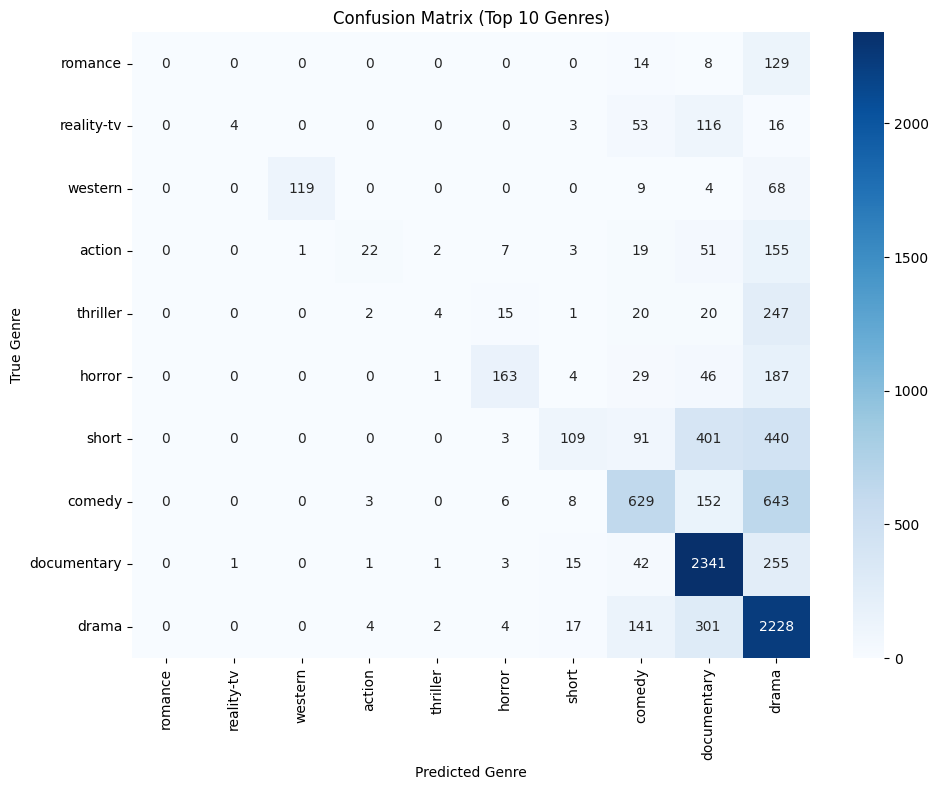

In [17]:
# @title Visualizing  Confusion matrix
# === Step 7: Confusion Matrix for Top 10 Genres ===
conf_mat = confusion_matrix(y_test, y_pred)

# Pick top 10 genres by number of samples
top_10_indices = np.argsort(np.bincount(y_test))[-10:]
filtered_conf_mat = conf_mat[top_10_indices][:, top_10_indices]
genre_labels = label_encoder.classes_[top_10_indices]

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=genre_labels, yticklabels=genre_labels)
plt.title("Confusion Matrix (Top 10 Genres)")
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.tight_layout()
plt.show()